# Problem 3

In this problem we are tasked to use logistic regression on an wide dataset. (One where the number of features is greater than the number of observations). We will use lasso regression and cross validation techniques  to predict tumorous/normal cells.

In [17]:
library(glmnet)
printf <- function(...) invisible(print(sprintf(...)))

In [18]:
# Read in the X-values
wdata = as.matrix(t(read.csv('gene_data.txt', header = FALSE)))
wdata = data.matrix(wdata)

In [19]:
# Read in the Y-values
y <- scan("/home/steven/applied_machine_learning/hw5/tissue_labels.html", what = "numeric") 
y = as.numeric(y)

# Binarize the columns.
y <- ifelse(y>0, 1, 0)

[1] "The number of coefficents used is: 7"
[1] "The AUC is: 0.927264"


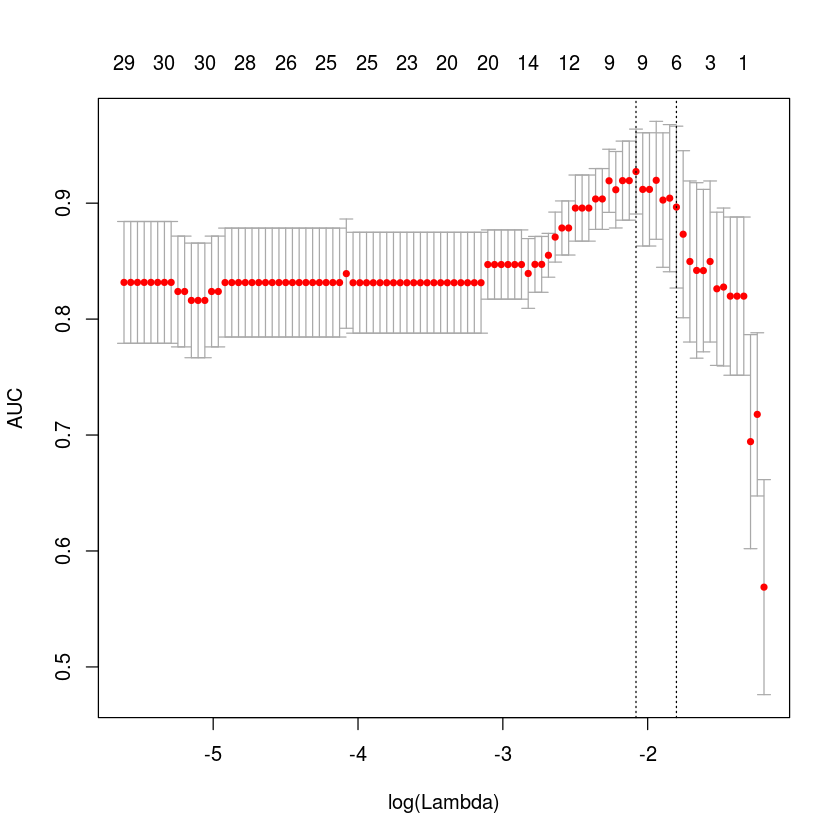

In [20]:
# Perform Binomial Logistic Regression looking at AUC using lasso regresssion.
model_AUC = cv.glmnet(wdata, y, family='binomial', type.measure="auc", nfolds=6, standardize=TRUE, alpha=1)
plot(model_AUC)

# Report the number of coefficents used for the model.
printf("The number of coefficents used is: %d", colSums(coef(model_AUC) != 0))
printf("The AUC is: %f", max(model_AUC$cvm))

[1] 0.06214394

[1] "The number of coefficents used is: 10"
[1] "The Deviation is: 0.825050"


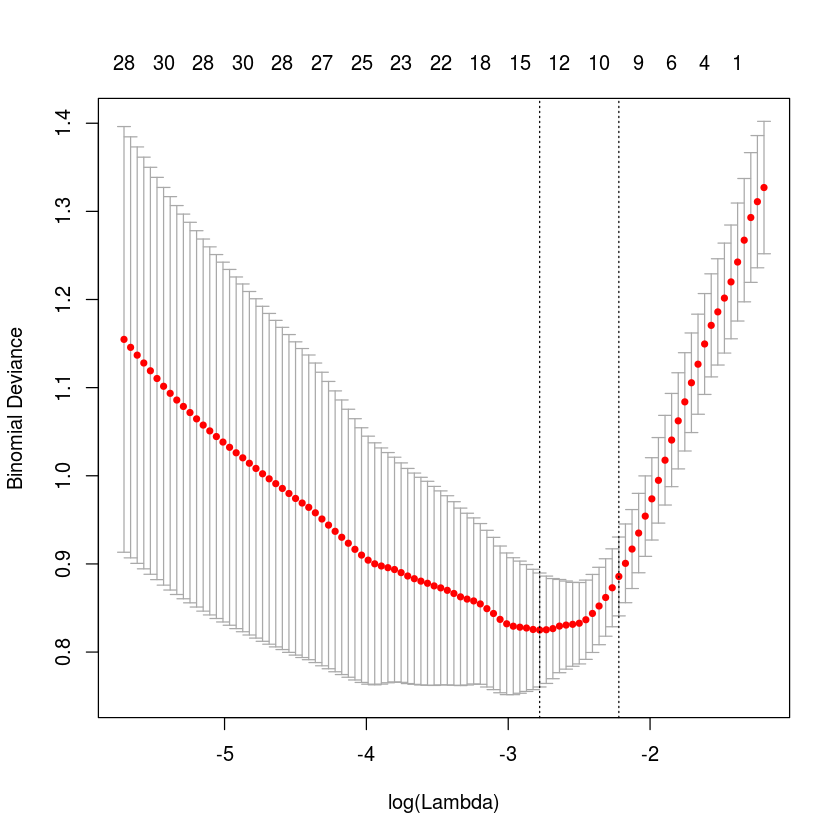

In [21]:
# Perform Binomial Logistic Regression looking at AUC using lasso regresssion.
model_DEV = cv.glmnet(wdata, y, family='binomial', type.measure="deviance", standardize=TRUE, alpha=1)
plot(model_DEV)

# Report the number of coefficents used for the model.
model_DEV$lambda.min
printf("The number of coefficents used is: %d", colSums(coef(model_DEV) != 0))
printf("The Deviation is: %f", min(model_DEV$cvm))

# Results
After performing the regression it was found that the AUC hovers around .93 and the deviance is around .8. In addition, the best model uses around 6-10 genes to predict the value.